<a href="https://colab.research.google.com/github/mgoetze06/fotobooth/blob/main/cvml/fotobox-cvml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import cv2
#from skimage import io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


import math
import os
import random
import shutil
#convert to script:
#jupyter nbconvert --to script *.ipynb
#jupyter nbconvert --to webpdf --allow-chromium-download fotobox-cvml.ipynb

# Face Frontal Classifier

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## basic face detection 

In [664]:
#face_cas = cv2.CascadeClassifier('../env/lib/python3.10/site-packages/cv2/data/haarcascade_frontalface_alt2.xml')
face_cas = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
#face_cas = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


In [45]:
face_cas = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_upperbody.xml')

In [13]:
face_cas = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_fullbody.xml')

(2592, 3888, 3)
(864, 1296, 3)


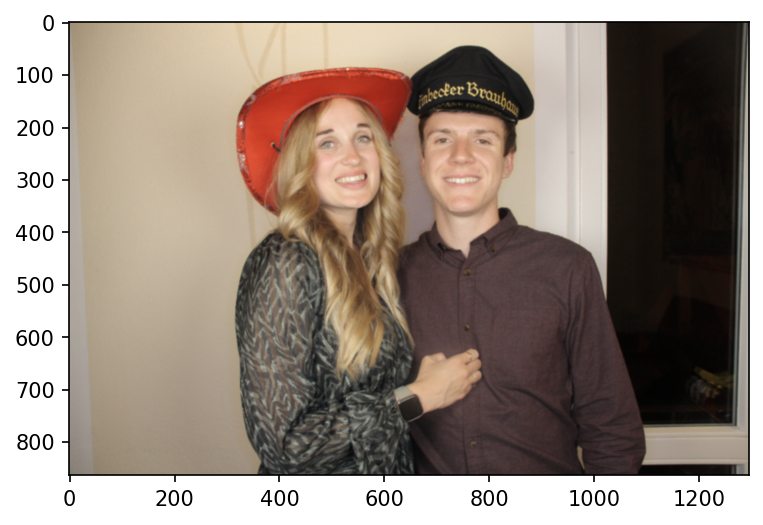

In [665]:
#cap = cv2.VideoCapture(0)
#img = cv2.imread('/content/drive/MyDrive/test.JPG', cv2.IMREAD_GRAYSCALE)
#org_img = cv2.imread('/content/drive/MyDrive/test.JPG')
#org_img = cv2.imread('/content/drive/MyDrive/cvml-emb/test_gruppe.jpg')
#org_img = cv2.imread('test_gruppe.jpg')
org_img = cv2.imread('test_gesicht3.jpg')
h_org,w_org,temp = org_img.shape
print(org_img.shape)
reduce_factor = 3
img = cv2.resize(org_img, (int(w_org/reduce_factor), int(h_org/reduce_factor)))
img = cv2.GaussianBlur(img, (5,5), 0)
#img = cv2.imread('/path_to_image/opencv-logo.png', 0) 
#cv2.imshow('image',img) not available in jupyter
#plt.imshow(img, cmap='gray')
plt.figure(figsize=(6, 4), dpi=150)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
print(img.shape)

In [666]:
#face detection

im_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
face_boxes,rejectLevels, levelWeights = face_cas.detectMultiScale3(im_gray, scaleFactor=1.01, minNeighbors=15, outputRejectLevels=True)
print(face_boxes)
print(rejectLevels)
print(levelWeights)

[[441 158 184 184]
 [658 160 187 187]
 [327 700  52  52]
 [559 803  54  54]
 [684 329 100 100]]
[25 25 25 25 25]
[9.80280505 7.14186205 3.53572996 3.88885107 1.36891517]


In [46]:
im_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
face_boxes,rejectLevels, levelWeights = face_cas.detectMultiScale3(im_gray, scaleFactor=1.01, minNeighbors=3, outputRejectLevels=True)
print(face_boxes)
print(rejectLevels)
print(levelWeights)

[[508 249 174 142]
 [609 142  68  56]
 [572 303 233 191]
 [247 325 296 242]
 [510 783  46  38]
 [755 318 146 119]
 [583 650  44  36]]
[30 30 30 30 30 30 30]
[1.12850153 0.06528341 0.26098698 0.90202007 0.3253372  1.79147976
 0.83871405]


True

<Figure size 432x288 with 0 Axes>

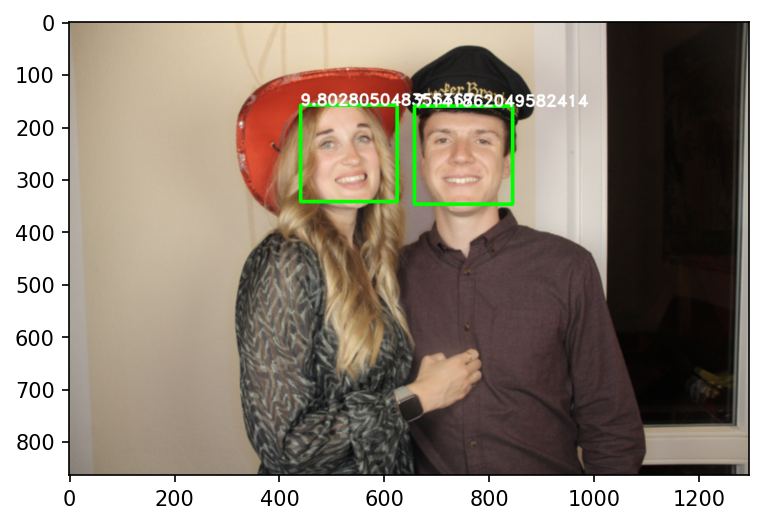

In [667]:
score_val = 4
i = 0
plt.clf()
faces = 0
for (x, y, w, h) in face_boxes:
  if (levelWeights[i]>score_val):
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 5)
    #cv2.rectangle(org_img,(int(x*reduce_factor), int(y*reduce_factor)),(int(x*reduce_factor + w*reduce_factor), int(y*reduce_factor + h*reduce_factor)), (0, 255, 0), 5)
    #cv2.putText(img,str(levelWeights[i][0]),(x,y),2,1,(255,255,255),2,cv2.LINE_AA)
    cv2.putText(img,str(levelWeights[i]),(x,y),2,1,(255,255,255),2,cv2.LINE_AA)
    faces = faces + 1
  i = i + 1
plt.figure(figsize=(6, 4), dpi=150)
#img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img, cmap='gray')
cv2.imwrite("face_detected.jpg", img)


#plt.savefig('test_detected.jpg')
#cv2.imshow('Output', img)
#cap.release()
#cv2.destroyAllWindows()

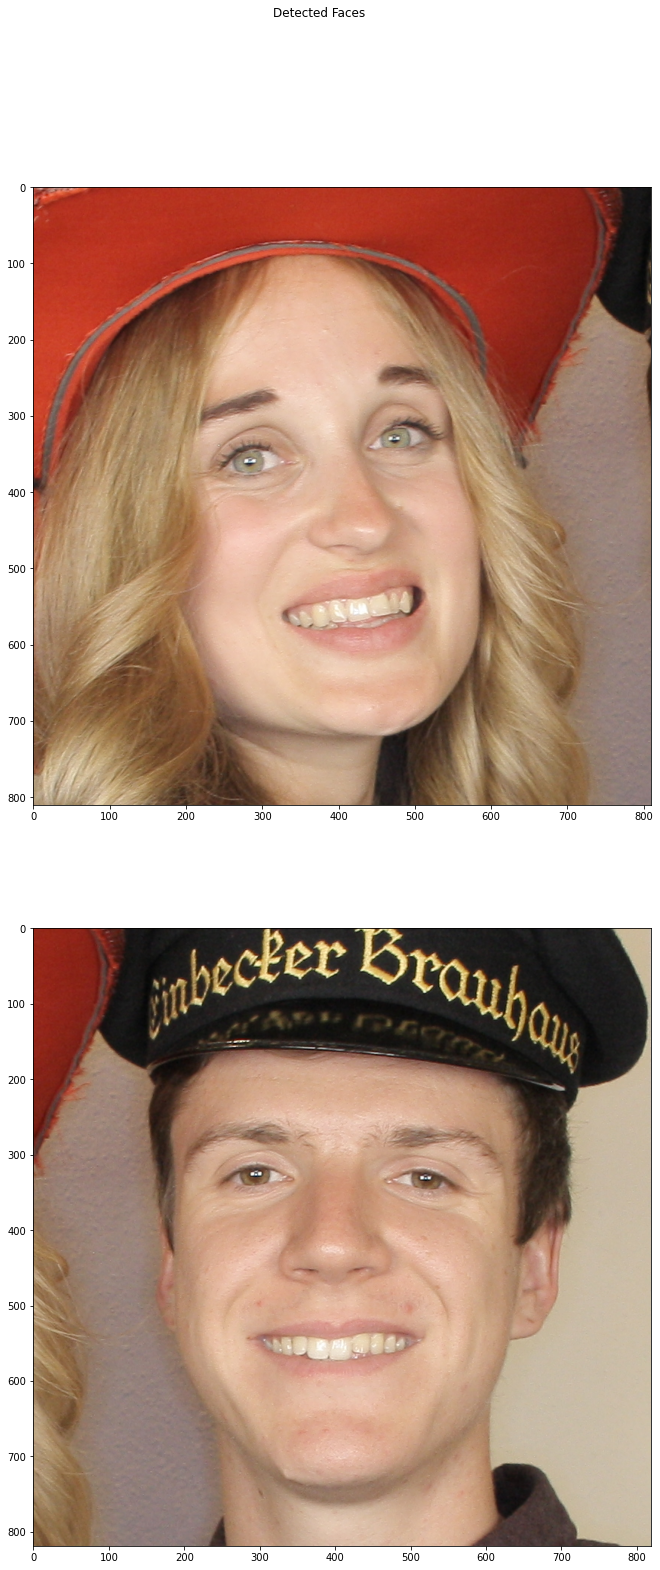

In [668]:
i = 0
#plt.figure(figsize=(4, 8), dpi=150)
fig,axs = plt.subplots(faces,figsize=(25,25))
axs_index = 0
fig.suptitle('Detected Faces')
for face_box in face_boxes:
  if (levelWeights[i]>score_val):
    x, y, w_box, h_box = face_box*reduce_factor
    #h_org of original image
    #w_org of original image
    #print(x, y, w_box, h_box)
    crop_padding = int(h_org/20) #crop border is 1/15 of the orig. image height
    x = x - crop_padding
    y = y - crop_padding
    if x <= 0:
      x = 0
    if y <= 0:
      y = 0

    #create size of face box with padding
    w_box = w_box + 2*crop_padding
    h_box = h_box + 2*crop_padding

    #if face is near edge --> cropped image is moved from edge away
    if (x + w_box) >= w_org:
      x = w_org - w_box
    if (y + h_box) >= h_org:
      y = h_org - h_box

    #print(x, y, w_box, h_box)
    cropped_img = org_img[y:y+h_box, x:x+w_box]

    #plt.imshow(cropped_img)
    new_cropped_img = cv2.cvtColor(cropped_img,cv2.COLOR_BGR2RGB)
    filename = "face%s.jpg"%(axs_index)
    cv2.imwrite(filename, cropped_img)
    axs[axs_index].imshow(new_cropped_img)

    axs_index = axs_index+1
  i = i+1


## face detection as a function

In [ ]:
def detectFaces(img,fileCount):
    face_cas = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    ### given an image object, returns the locations of the faces
    org_img = cv2.imread(img)
    name = img[-12:-4]
    h_org,w_org,temp = org_img.shape
    print(org_img.shape)
    reduce_factor = 3
    img = cv2.resize(org_img, (int(w_org/reduce_factor), int(h_org/reduce_factor)))
    img = cv2.GaussianBlur(img, (5,5), 0)
    #img = cv2.imread('/path_to_image/opencv-logo.png', 0) 
    #cv2.imshow('image',img) not available in jupyter
    #plt.imshow(img, cmap='gray')
    #plt.figure(figsize=(6, 4), dpi=150)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    #plt.imshow(img)
    #print(img.shape)
    im_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    #face_boxes = face_cas.detectMultiScale(im_gray, scaleFactor=1.05, minNeighbors=9)
    #face_boxes,rejectLevels, levelWeights = face_cas.detectMultiScale3(im_gray, scaleFactor=1.05, minNeighbors=9, outputRejectLevels=True)
    #face_boxes,rejectLevels, levelWeights = face_cas.detectMultiScale3(im_gray, scaleFactor=1.2, minNeighbors=9, outputRejectLevels=True)
    #face_boxes,rejectLevels, levelWeights = face_cas.detectMultiScale3(im_gray, scaleFactor=1.15, minNeighbors=20, outputRejectLevels=True)
    face_boxes,rejectLevels, levelWeights = face_cas.detectMultiScale3(im_gray, scaleFactor=1.05, minNeighbors=5, outputRejectLevels=True)
    #print(face_boxes)
    #print(rejectLevels)
    #print(levelWeights)
    score_val = 6.5
    i = 0
    #plt.clf()
    faces = 0
    for (x, y, w, h) in face_boxes:
      if (levelWeights[i]>score_val):
        #cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 5)
        #cv2.rectangle(org_img,(int(x*reduce_factor), int(y*reduce_factor)),(int(x*reduce_factor + w*reduce_factor), int(y*reduce_factor + h*reduce_factor)), (0, 255, 0), 5)
        #cv2.putText(img,str(levelWeights[i][0]),(x,y),2,1,(255,255,255),2,cv2.LINE_AA)
        #cv2.putText(img,str(levelWeights[i]),(x,y),2,1,(255,255,255),2,cv2.LINE_AA)
        faces = faces + 1
      i = i + 1
    #plt.figure(figsize=(6, 4), dpi=150)
    #img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    #plt.imshow(img, cmap='gray')
    #cv2.imwrite("face_detected.jpg", img)
    i = 0
    #plt.figure(figsize=(4, 8), dpi=150)
    #fig,axs = plt.subplots(faces,figsize=(25,25))
    fileCount = fileCount + 1
    faceindex = 0
    #fig.suptitle('Detected Faces')
    for face_box in face_boxes:
      if (levelWeights[i]>score_val):
        x, y, w_box, h_box = face_box*reduce_factor
        #h_org of original image
        #w_org of original image
        #print(x, y, w_box, h_box)
        crop_padding = int(h_org/20) #crop border is 1/15 of the orig. image height
        x = x - crop_padding
        y = y - crop_padding
        if x <= 0:
          x = 0
        if y <= 0:
          y = 0

        #create size of face box with padding
        w_box = w_box + 2*crop_padding
        h_box = h_box + 2*crop_padding

        #if face is near edge --> cropped image is moved from edge away
        if (x + w_box) >= w_org:
          x = w_org - w_box
        if (y + h_box) >= h_org:
          y = h_org - h_box

        #print(x, y, w_box, h_box)
        cropped_img = org_img[y:y+h_box, x:x+w_box]

        #plt.imshow(cropped_img)
        #new_cropped_img = cv2.cvtColor(cropped_img,cv2.COLOR_BGR2RGB)
        filename = "faces/%s_face%s.jpg"%(name,faceindex)
        cv2.imwrite(filename, cropped_img)
        #axs[axs_index].imshow(new_cropped_img)

        faceindex = faceindex+1
      i = i+1

    

In [ ]:
def listImagesInDir(path):
    return len(glob.glob(path))
    

In [ ]:
import glob
images = glob.glob("training_data/*JPG")
print(images)

for image in images:
    totalfaces = listImagesInDir("faces/*.jpg")
    #print(image[-12:-4])

    detectFaces(image,totalfaces)


['training_data\\IMG_3926.JPG', 'training_data\\IMG_3942.JPG', 'training_data\\IMG_3944.JPG', 'training_data\\test_gesicht.JPG', 'training_data\\test_gesicht2.JPG', 'training_data\\test_gesicht3.JPG']
(2592, 3888, 3)
(2592, 3888, 3)
(2592, 3888, 3)
(2592, 3888, 3)
(2592, 3888, 3)
(2592, 3888, 3)


TODO: Create directories for good and bad classified images. Process handling (face detection in seperate process, camera, lights ...)

## Smile Classifier

In [ ]:
#smile_cas = cv2.CascadeClassifier('../env/lib/python3.10/site-packages/cv2/data/haarcascade_smile.xml')
smile_cas = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')

In [ ]:
img = cv2.imread('face0.jpg')

In [ ]:
#success, img = cap.read()
im_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
smile_boxes,rejectLevels, levelWeights = smile_cas.detectMultiScale3(im_gray, scaleFactor=1.05, minNeighbors=40, outputRejectLevels=True)
if (len(smile_boxes)<1):
  print("why no smile?")
else:
    print(np.argmax(levelWeights))
    print(smile_boxes)
    print(rejectLevels)
    print(levelWeights)


8
[[ 52 564  72  36]
 [116 617  47  24]
 [369 441 103  52]
 [691 604  82  41]
 [309  55  95  47]
 [611 409  75  37]
 [295 220 129  65]
 [351 288  74  37]
 [297 517 252 126]
 [ 55 237 210 105]
 [172 486 177  88]
 [214 356 121  60]
 [693 743  91  46]
 [287 713 124  62]
 [428 316 112  56]
 [683 532  66  33]
 [581 358  76  38]
 [487 372 107  53]]
[20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20]
[ 3.10686631  2.58480827  2.37202734  0.78671545  2.30246222  1.81336402
  1.12613351  1.55130803  5.16170594  1.3807219   1.61287324  2.34799946
  0.82762243  1.55407724  1.80428768  2.41659638  1.33428334 -0.06249687]


In [ ]:
#for (x, y, w, h) in smile_boxes:
  #cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 5)
    
(x, y, w, h) = smile_boxes[np.argmax(levelWeights)]
_ = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 5)

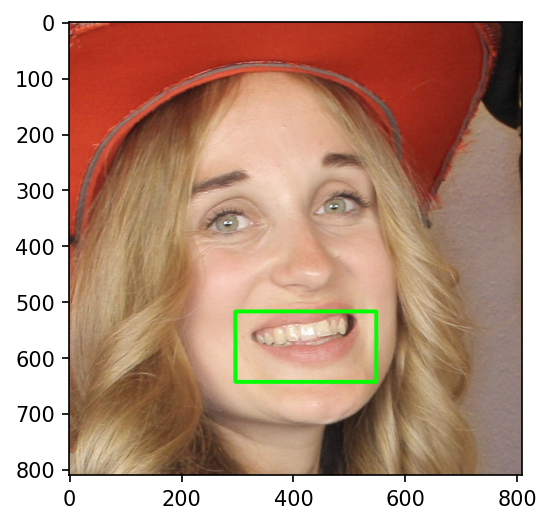

In [ ]:
plt.figure(figsize=(6, 4), dpi=150)
#img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img, cmap='gray')

Create own cascade classifier. Multiple objects (special glasses, hats etc used in fotobooth) 
Somehow it would be cool to detect these objects because they are significantly shown on screen (in relation to the face. Face is covered by glasses. --> no face detection but detection of glasses could work)


# Gesture Detection

In [1]:
#code from: https://techvidvan.com/tutorials/hand-gesture-recognition-tensorflow-opencv/

#pip install opencv-python
#pip install mediapipe
#pip install tensorflow
#https://techvidvan.s3.amazonaws.com/machine-learning-projects/hand-gesture-recognition-code.zip

# import necessary packages for hand gesture recognition project using Python OpenCV
import cv2
import numpy as np
import mediapipe as mp
import tensorflow as tf
from tensorflow.keras.models import load_model

In [2]:
mpHands = mp.solutions.hands
hands = mpHands.Hands(max_num_hands=2, min_detection_confidence=0.8)
mpDraw = mp.solutions.drawing_utils

In [3]:
# Load the gesture recognizer model

model = load_model('hand-gesture-recognition-code\mp_hand_gesture')
#model = load_model('mp_hand_gesture')
# Load class name
f = open('hand-gesture-recognition-code\gesture.names', 'r')
classNames = f.read().split('\n')
f.close()
print(classNames)

['okay', 'peace', 'thumbs up', 'thumbs down', 'call me', 'stop', 'rock', 'live long', 'fist', 'smile']


(696, 620, 3)
(696, 620, 3)


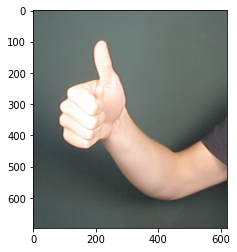

In [6]:
#thumbs_img = cv2.imread('thumbsup.jpg')
#thumbs_img = cv2.imread('thumbsup2.jpg')
thumbs_img = cv2.imread('C:/projects/fotobooth/vortrag/up_raw.png')

#thumbs_img = cv2.imread('thumbsdown.jpg')

#thumbs_img = cv2.imread('face0.jpg')


h_org,w_org,temp = thumbs_img.shape
print(thumbs_img.shape)
reduce_factor = 6
#thumbs_img = cv2.resize(thumbs_img, (int(w_org/reduce_factor), int(h_org/reduce_factor)))
#thumbs_img = cv2.GaussianBlur(thumbs_img, (5,5), 0)
framergb = cv2.cvtColor(thumbs_img, cv2.COLOR_BGR2RGB)
plt.clf()
plt.imshow(framergb)
x , y, c = framergb.shape
print(framergb.shape)

In [7]:
def calc_landmark_center(landmarks):
    ###for simplicity get average of landmarks and use this as center for a hand
    x = 0
    y = 0
    samples = len(landmarks)
    for lm in landmarks:
        x = x + lm[0]
        y = y + lm[1]
    x = int(x/samples)
    y = int(y/samples)
    return x,y

def get_thumb_orientation(landmarks,show_debug):
    ###return the orientation of the hand: true = thumbsup; false = thumbsdown
    max_y = 0
    min_y = 1000000
    samples = len(landmarks)
    for lm in landmarks:
        if lm[1] > max_y:
            max_y = lm[1]
        if lm[1] <= min_y:
            min_y = lm[1]
    
    #lm[4] #thumb landmark

    dist_top = max_y - landmarks[4][1]
    
    dist_bottom = min_y - landmarks[4][1]
    
    if dist_bottom == 0.0:
        orientation = True #thumbsup
        if show_debug:
            print("thumbsup")
    elif dist_top == 0.0:
        orientation = False #thumbsdown
        if show_debug:
            print("thumbsdown")
    
    if ((dist_bottom != 0.0) and (dist_top != 0.0)):
        valid = False
    else:
        valid = True
    
    
    
    if show_debug:
        print("hand landmark.y from %s to %s"%(min_y,max_y))
        print("thumb landmark: %s"%landmarks[4][1])
        print("distance top: %s"%dist_top)
        print("distance bottom: %s"%dist_bottom)
    #print(max_y,min_y)
    
    return orientation,valid

## process frame to detect hand landmarks 

In [8]:
# Get hand landmark prediction

#process twice due to better results
counter = 0
while counter < 2:
    result = hands.process(framergb)
    className = ''
    # post process the result
    if result.multi_hand_landmarks:
        print("found hand landmarks")
        landmarks_pred = []
        landmarks_draw = []
        shape = thumbs_img.shape
        for handslms in result.multi_hand_landmarks:
            for lm in handslms.landmark:
                lmx = int(lm.x * x)
                lmy = int(lm.y * y)
                landmarks_pred.append([lmx, lmy])
                landmarks_draw.append([lm.x * shape[1],lm.y * shape[0]])
                cv2.circle(thumbs_img,(int((lmx/x)*y), int((lmy/y)*x)),15,(255, 0, 0))              
            mpDraw.draw_landmarks(thumbs_img, handslms, mpHands.HAND_CONNECTIONS)
    else:
        print("no hand landmarks")
    counter = counter + 1
# Drawing landmarks on frames
#rx,ry = calc_landmark_center(landmarks_draw)
#thumb_up_down = get_thumb_orientation(landmarks_draw,False)
#print(rx,ry)
#_ = cv2.circle(thumbs_img,(rx,ry),100,(0, 255, 255))

found hand landmarks
found hand landmarks


## calculate prediction based on landmarks with 1) model.predict and 2) distance

1/1 [==============================] - 0s 38ms/step
[8.4186394e-11 4.4593843e-08 9.9179101e-01 1.5490401e-05 8.1145493e-03
 5.0158845e-24 5.6884353e-10 5.1266944e-15 3.2065313e-07 7.8715981e-05]
model prediction: thumbs up
landmark calculation: thumb_up


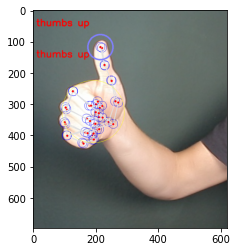

In [11]:
# Predict gesture in Hand Gesture Recognition project
if result.multi_hand_landmarks:
    for i in range(len(landmarks_pred)//21):
        #predict hand class with model
        prediction = model.predict([landmarks_pred[i*21:(21+(i*21))]]) #problem with predict if more than one hand is detected
        #prediction = model.predict([landmarks_pred[0:21]])
        #--> landmarks sind dann doppelt so lang wie sie für eine hand sein müssten
        pred = prediction.flatten()
        print(pred)
        classID = np.argmax(pred[0:len(pred)-1]) #ignore smile

        className = classNames[classID]
        print("model prediction: %s"%className)
        cv2.putText(thumbs_img, className, (10, (150+i*50)), cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2, cv2.LINE_AA)


        #seperate thumb up from thumb down based on max y position
        thumb_up_down,valid_thumb_orientation = get_thumb_orientation(landmarks_draw[i*21:(21+(i*21))],False)
        if valid_thumb_orientation:
            if thumb_up_down:
                print("landmark calculation: thumb_up")
            else:
                print("landmark calculation: thumb_down")
            thumb_offset = 4
            cv2.circle(thumbs_img,(int(landmarks_draw[(i*21)+thumb_offset][0]),int(landmarks_draw[(i*21)+thumb_offset][1])),40,(255,128,128),4)


        #get average hand position for future usage
        rx,ry = calc_landmark_center(landmarks_draw[i*21:(21+(i*21))]) 
        cv2.circle(thumbs_img,(rx,ry),100,(0, 255, 255))
    plt.clf()
    framergb = cv2.cvtColor(thumbs_img, cv2.COLOR_BGR2RGB)
    plt.imshow(framergb)
    #cv2.cvtColor(thumbs_img, cv2.COLOR_RGB2BGR)
    cv2.imwrite("thumbs.jpg", thumbs_img)
else:
    print("no hand landmarks in img")

https://answers.opencv.org/question/24154/how-to-using-opencv-api-get-web-video-stream/

# Image Composition for gallery images

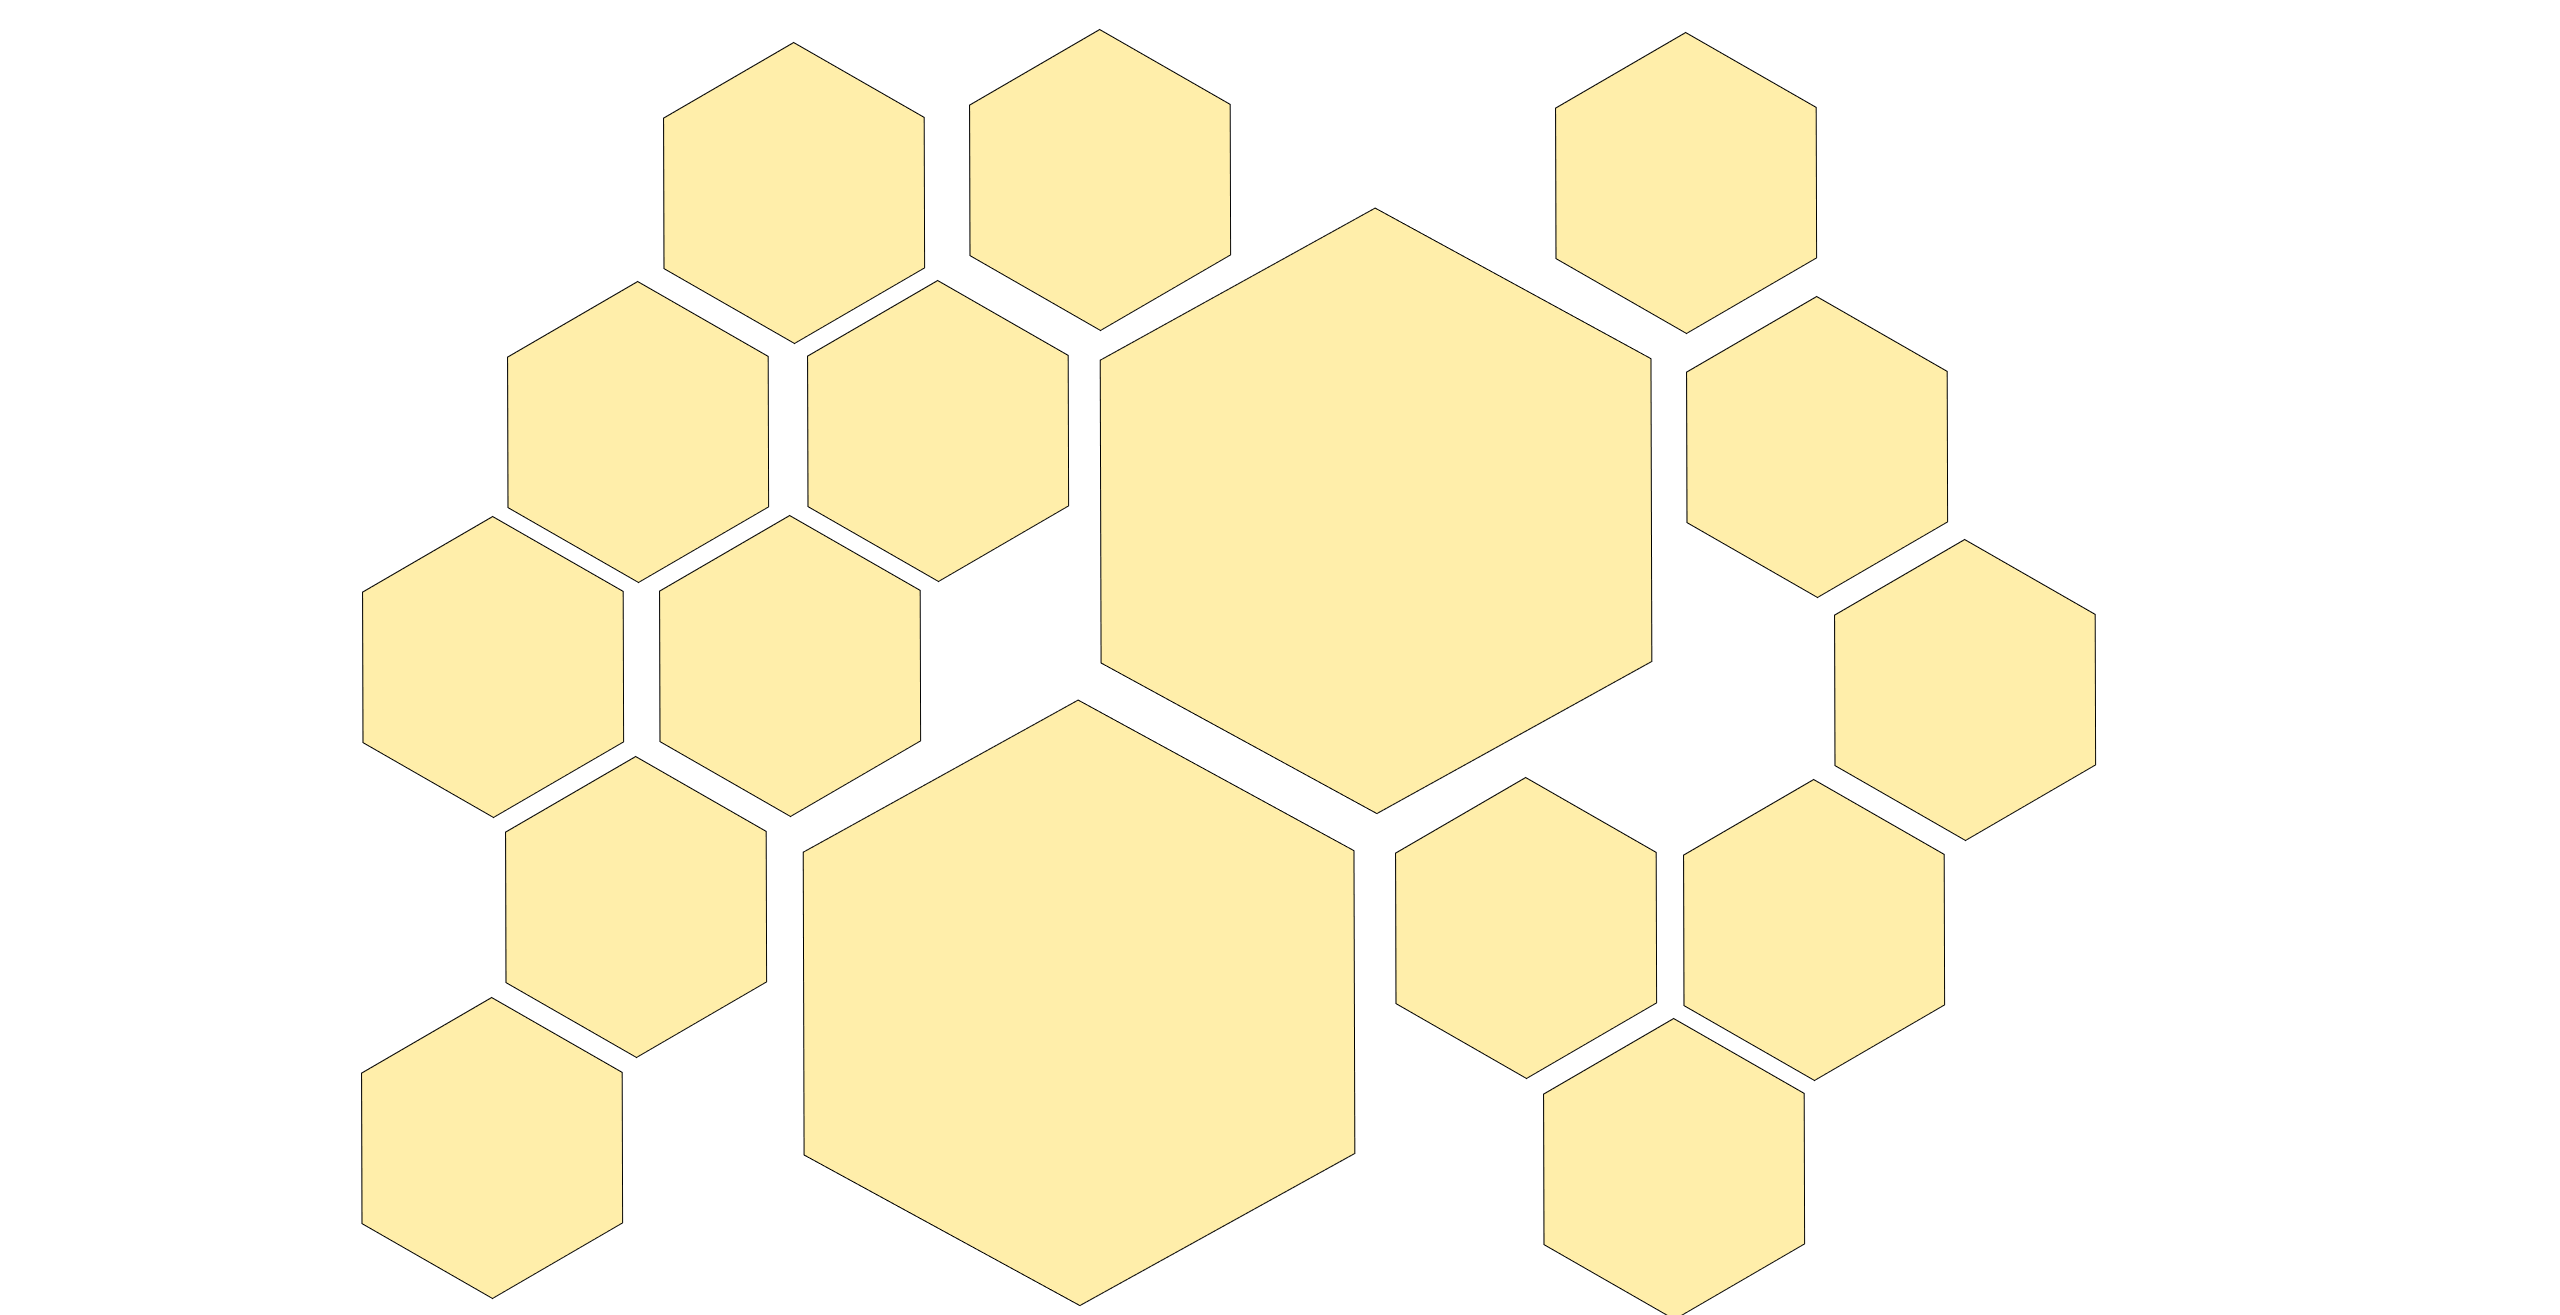

fill image with hexagonal face areas

In [1]:
import math
from PIL import Image, ImageDraw, ImageFilter, ImageOps
from PIL import ImagePath 
import os
import random
import glob

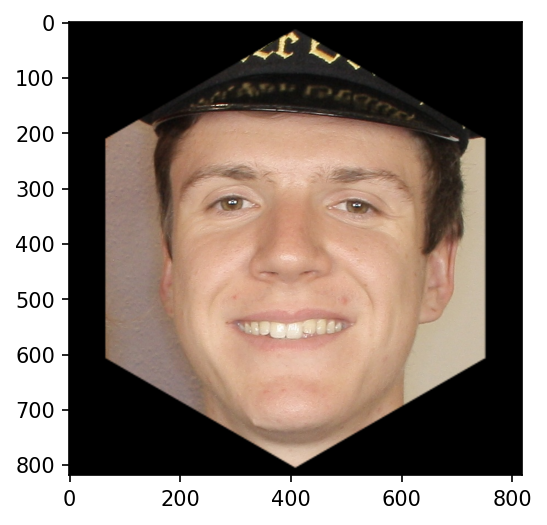

In [654]:
#https://note.nkmk.me/en/python-pillow-composite/

#screen width 1920
#screen height 1080  
  



#img_face = Image.open('/content/drive/MyDrive/cvml-emb/face0.jpg')
img_face = Image.open('face1.jpg')
#img_background = Image.open('/content/drive/MyDrive/cvml-emb/test_gruppe.jpg').resize(img_face.size)
img_background = Image.open('background.jpg').resize(img_face.size)

img_background = Image.new(mode = "RGB", size = img_face.size,
                           color = (0, 0, 0))

#mask = Image.open('/content/drive/MyDrive/cvml-emb/hex.png').resize(img_face.size)
mask = Image.open('hex.png').resize(img_face.size)
#mask_blur = mask.filter(ImageFilter.GaussianBlur(10))
im = Image.composite(img_face, img_background, mask)
plt.figure(figsize=(6, 4), dpi=150)
plt.imshow(im)

In [ ]:
!pip install Pillow==9.1.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.1 MB 4.2 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [656]:
class HexPoint:
    def __init__(self, index, x,y,visible,size):
        self.index = index
        self.x = x
        self.y = y
        self.visible = visible
        self.size = size

def readHexFromCSV(filename):
    f = open(filename, 'r')
    hex_points = []
    lines = f.readlines()
    print("got %d lines from %s with header: "%(len(lines),filename))
    print(lines[0].split(";"))
    for line in lines:
        if not (line[0] == 'i'):
            line = line.strip().split(";")
            #print(line[5])
            hex_points = hex_points + [(line[0],line[1],line[2],line[3],line[4],line[5])]
    #print(hex_points)
    return hex_points

In [660]:
hex_points_csv = readHexFromCSV('hex_locations.csv')
#hex_points_csv[0]

got 37 lines from hex_locations.csv with header: 
['index', 'x', 'y', 'visible', 'size', 'used\n']


In [658]:
#7 per row
#5 rows
visible_hex = [1,1,1,1,0,1,1,
               1,1,1,0,0,1,0,
               1,1,1,0,0,0,1,
               1,1,1,1,1,1,0,
               0,0,0,0,0,0,0]
print(visible_hex)

[1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]


58.457
141.93366666666665
dy 224
dx 129


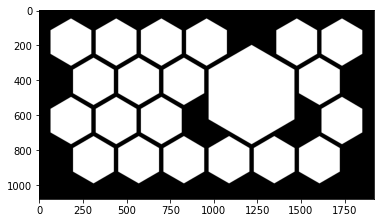

In [659]:
screen_size = (1920,1080)
hex_dia = 135 #length of the hexagon (circle creating it)
hex_internal_h = round((hex_dia/2)*math.sin(math.pi/3),3)
print(hex_internal_h)
padding = 250

#calculate horizontal spacing
hex_per_row = 7
total_space_between_hex = screen_size[0] - padding - 2*hex_internal_h*(hex_per_row)
hex_outer_distance = total_space_between_hex/(hex_per_row-1) #distance between parallel sides --> calculate based on screen size not fixed
print(hex_outer_distance)

hex_horizontal_distance = 2*hex_internal_h+hex_outer_distance

hex_angled_dx = hex_horizontal_distance *math.sin(math.pi/6)
hex_angled_dy = hex_horizontal_distance *math.cos(math.pi/6)
print("dy %d"%hex_angled_dy)
print("dx %d"%hex_angled_dx)
#columns = int((base_width - hex_outer_distance)/hex_dia) + 2
#print(columns)
x_off = padding/2 + hex_internal_h
y_off = padding/2 + hex_internal_h
rows = 5
hex_points = np.empty(hex_per_row*rows, dtype=object)
for row in range(rows):
  new_y_off = y_off + (row*hex_angled_dy)
  
  #print(row%2)
  if (row%2)==0:
    new_x_off = x_off
  else:
    new_x_off = x_off + hex_angled_dx
  for column in range(hex_per_row):
    new_x = int(new_x_off + (column*hex_horizontal_distance))
    new_y = new_y_off
    hex_points[(row*hex_per_row) + column] = (new_x,new_y) #last item is showing_index; w

#print(hex_points)

mask = Image.new(mode="RGB",size = screen_size, color = (0,0,0)) #(mode = "L", 
draw = ImageDraw.Draw(mask)

f = open('hex_locations.csv', 'w+')
f.write('index;x;y;visible;size;used\n')
for index,point in enumerate(hex_points):
    f.write('%d;%d;%d;%d;%d;%d\n'%(index,point[0],point[1],visible_hex[index],hex_dia,0))
    if visible_hex[index]==1:
        draw.regular_polygon(bounding_circle=(point,hex_dia), n_sides=6, rotation=90, fill=(255,255,255))

big_one = (hex_points[9][0] + int((hex_points[12][0] - hex_points[9][0])/2),(hex_points[9][1] + 75))       
draw.regular_polygon(bounding_circle=(big_one,2.1*hex_dia), n_sides=6, rotation=90, fill=(255,255,255))
f.write('%d;%d;%d;%d;%d;%d\n'%(1000,big_one[0],big_one[1],visible_hex[index],2.1*hex_dia,0))
f.close()
plt.imshow(mask)
_ = mask.save("mask.jpg")


#mask is not used to generate collage --> only the points and size from hexpoints is used to draw onto the background

TODO: LGS mit Abstand horizontal und vertikal löst noch nicht für die hexagons die richtige distanz aus. Siehe skizze (analog, papier)


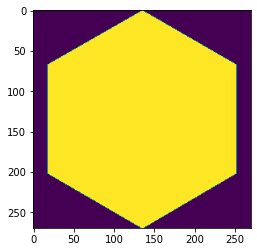

In [661]:
masksize = int(2*hex_dia)
#background = Image.open('background.jpg').resize(screen_size).convert("RGB")
img_face = Image.open('face1.jpg').resize((masksize,masksize)).convert("RGB")
mask = Image.new(mode="L",size = (masksize,masksize), color = (0)) #(mode = "L", 
draw = ImageDraw.Draw(mask)

draw.regular_polygon(bounding_circle=((masksize/2,masksize/2),hex_dia), n_sides=6, rotation=90, fill=(255))
plt.imshow(mask)
#background.paste(img_face,(int(hex_points[0][0]),int(hex_points[0][1])),mask)
#for point in hex_points:
#  draw.regular_polygon(bounding_circle=(point,hex_dia), n_sides=6, rotation=90, fill=(255,255,255))
#im = Image.composite(img_face, img_background, mask)
#plt.imshow(background)

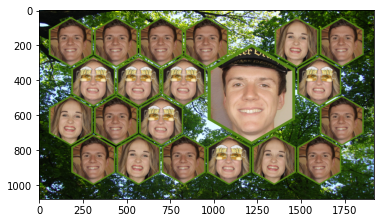

In [662]:

#import dircache

masksize = int(2*hex_dia)
background = Image.open('background.jpg').resize(screen_size).convert("RGB")
img_face = Image.open('face1.jpg').resize((masksize,masksize)).convert("RGB")


mask = Image.new(mode="L",size = (masksize,masksize), color = (0)) #(mode = "L", 
draw = ImageDraw.Draw(mask)
draw.regular_polygon(bounding_circle=((masksize/2,masksize/2),hex_dia), n_sides=6, rotation=90, fill=(255))

f_outl = 1.07
outline_mask = Image.new(mode="L",size = (int(f_outl*masksize),int(f_outl*masksize)), color = (0)) #(mode = "L", 
outline_draw = ImageDraw.Draw(outline_mask)
outline_draw.regular_polygon(bounding_circle=((int((f_outl*masksize)/2),int((f_outl*masksize)/2)),f_outl*hex_dia), n_sides=6, rotation=90, fill=(255))
img_outline = Image.open('green.png').resize((int(f_outl*masksize),int(f_outl*masksize))).convert("RGB")

#here only face classified as true face
big_mask = Image.new(mode="L",size = (2*masksize,2*masksize), color = (0)) #(mode = "L", 
big_draw = ImageDraw.Draw(big_mask)
big_draw.regular_polygon(bounding_circle=((masksize,masksize),2*hex_dia), n_sides=6, rotation=90, fill=(255))
big_img_face = Image.open('face1.jpg').resize((2*masksize,2*masksize)).convert("RGB") 

big_outline_mask = Image.new(mode="L",size = (int(f_outl*2*masksize),int(f_outl*2*masksize)), color = (0)) #(mode = "L", 
big_outline_draw = ImageDraw.Draw(big_outline_mask)
big_outline_draw.regular_polygon(bounding_circle=((int((f_outl*2*masksize)/2),int((f_outl*2*masksize)/2)),f_outl*2*hex_dia), n_sides=6, rotation=90, fill=(255))
big_img_outline = Image.open('green.png').resize((int(f_outl*2*masksize),int(f_outl*2*masksize))).convert("RGB")

#plt.imshow(outline_mask)


#plt.imshow(mask)
for index,point in enumerate(hex_points):
    #print(point)
    if visible_hex[index]==1:
        filename = random.choice(glob.glob("faces/*jpg")) 
        img_face = Image.open(filename).resize((masksize,masksize)).convert("RGB")
        #draw.regular_polygon(bounding_circle=(point,hex_dia), n_sides=6, rotation=90, fill=(255,255,255))
        background.paste(img_outline,(int(point[0]-f_outl*hex_dia),int(point[1]-f_outl*hex_dia)),outline_mask)
        background.paste(img_face,(int(point[0]-hex_dia),int(point[1]-hex_dia)),mask)

background.paste(big_img_outline,(int(big_one[0]-f_outl*2*hex_dia),int(big_one[1]-f_outl*2*hex_dia)),big_outline_mask)
background.paste(big_img_face,(int(big_one[0]-2*hex_dia),int(big_one[1]-2*hex_dia)),big_mask)

#  draw.regular_polygon(bounding_circle=(point,hex_dia), n_sides=6, rotation=90, fill=(255,255,255))
#im = Image.composite(img_face, img_background, mask)

plt.imshow(background)

#cv2.imwrite("collage.jpg", background)
background = background.save("collage.jpg")

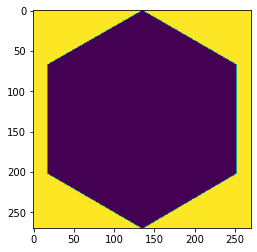

In [663]:
#mask = mask.convert('RGB')
mask_invert = ImageOps.invert(mask)
plt.imshow(mask_invert)
mask_invert = mask_invert.save("mask_invert.jpg")

Ziel dieser Aktion ist es, mittels einer weiteren "Maske" nur die relevanten Sechsecke auszuwählen wie in dem skizzierten Aufbau (siehe Bild jpg)
z.B. np array mit 0 für unsichtbar; 1 für sichtbar für jede Position
andere Variante: klasse hexagon erstellen --> position x, y, sichtbarkeit, radius, orientierung (Drehung)

Anschließend erneutes Hinzufügen von größeren Sechsecken, die genau in das Muster passen --> Denkbar für Titel der Bilder oder für ausgewählte Bilder (durch Gesten klassifizierte Bilder sind auf jeden Fall gut --> können hier groß dargestellt werden)

Auswahl von Bildern:
Welche Bilder werden für die Darstellung im Sechseck ausgewählt?
Idee: klassifizierung mit thumbs up / thumbs down


Refactoring: Sechseck als Klasse

476.672
[(960, 700), (1198.336, 287.18993872726406), (1436.672, 700), (483.328, 700), (721.664, 287.18993872726406)]


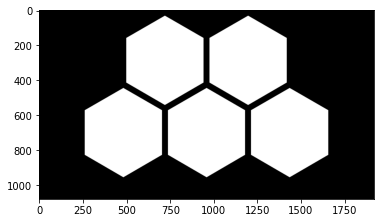

In [ ]:
#5 der als "gut" klassifizierten Bilder als sechsecke darstellen

screen_size = (1920,1080)
hex_dia = 255 #length of the hexagon (circle creating it)
hex_internal_h = round((hex_dia/2)*math.sin(math.pi/3),3)

#calculate horizontal spacing
hex_outer_distance = 35
hex_horizontal_distance = 4*hex_internal_h+hex_outer_distance
print(hex_horizontal_distance)
#hex_angled_dx = hex_horizontal_distance / 2
hex_angled_dy = hex_horizontal_distance *math.sin(math.pi/3)
big_points = [(960,700)]

big_points = big_points + [(big_points[0][0]+hex_horizontal_distance/2,big_points[0][1]-hex_angled_dy)]
big_points = big_points + [(big_points[0][0]+hex_horizontal_distance,big_points[0][1])]
big_points = big_points + [(big_points[0][0]-hex_horizontal_distance,big_points[0][1])]
big_points = big_points + [(big_points[0][0]-hex_horizontal_distance/2,big_points[0][1]-hex_angled_dy)]

f = open('big_hex_locations.csv', 'w+')
f.write('index;x;y;visible;size;used\n')
print(big_points)
mask = Image.new(mode="RGB",size = screen_size, color = (0,0,0)) #(mode = "L", 
draw = ImageDraw.Draw(mask)
for index,point in enumerate(big_points):
  draw.regular_polygon(bounding_circle=(point,hex_dia), n_sides=6, rotation=90, fill=(255,255,255))
  f.write('%d;%d;%d;%d;%d;%d\n'%(index,point[0],point[1],1,hex_dia,0))
f.close()
plt.imshow(mask)

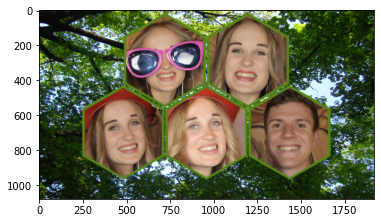

In [ ]:
hex_dia = 255
masksize = int(2*hex_dia)
background = Image.open('background.jpg').resize(screen_size).convert("RGB")

mask = Image.new(mode="L",size = (masksize,masksize), color = (0)) #(mode = "L", 
draw = ImageDraw.Draw(mask)
draw.regular_polygon(bounding_circle=((masksize/2,masksize/2),hex_dia), n_sides=6, rotation=90, fill=(255))

f_outl = 1.06
outline_mask = Image.new(mode="L",size = (int(f_outl*masksize),int(f_outl*masksize)), color = (0)) #(mode = "L", 
outline_draw = ImageDraw.Draw(outline_mask)
outline_draw.regular_polygon(bounding_circle=((int((f_outl*masksize)/2),int((f_outl*masksize)/2)),f_outl*hex_dia), n_sides=6, rotation=90, fill=(255))
img_outline = Image.open('green.png').resize((int(f_outl*masksize),int(f_outl*masksize))).convert("RGB")

used_files = []

for index,point in enumerate(big_points):
    #print(point)
    filename = random.choice(glob.glob("faces/pos/*jpg")) 
    while filename in used_files:
        filename = random.choice(glob.glob("faces/pos/*jpg")) 
    used_files = used_files + [filename]
    img_face = Image.open(filename).resize((masksize,masksize)).convert("RGB")
    #draw.regular_polygon(bounding_circle=(point,hex_dia), n_sides=6, rotation=90, fill=(255,255,255))
    background.paste(img_outline,(int(point[0]-f_outl*hex_dia),int(point[1]-f_outl*hex_dia)),outline_mask)
    background.paste(img_face,(int(point[0]-hex_dia),int(point[1]-hex_dia)),mask)

#  draw.regular_polygon(bounding_circle=(point,hex_dia), n_sides=6, rotation=90, fill=(255,255,255))
#im = Image.composite(img_face, img_background, mask)

plt.imshow(background)

#cv2.imwrite("collage.jpg", background)
background = background.save("selection_collage.jpg")

In [ ]:
def readHexPointsFromCSV(filename):
    f = open(filename, 'r')
    hex_points = []
    lines = f.readlines()
    #print("got %d lines from %s with header: "%(len(lines),filename))
    #print(lines[0].split(";"))
    for line in lines:
        if not (line[0] == 'i'):
            line = line.strip().split(";")
            #print(line[5])
            hex_points = hex_points + [(int(line[1]),int(line[2]))]
    #print(hex_points)
    return hex_points
def placeMultipleHexagon(background,img,position,dia,outline,rot):
    #drawing a mask as a hexagon, then applying this mask to the img and pasting this img on the background
    #dia = hex diameter
    #rot = hex rotation (0 for flat side up, 90 for tip up)
    #outline = drawing an outline as a factor of masksize around the hexagon (only using green at the moment)
    #position = multiple tuple of (x,y)   
    
    #background: single path to image from background
    #img: list of filenames that contain the used faces
    
    #position and img list need to have same size!
    
    masksize = int(2*dia)
    back = Image.open(background).resize((1920,1080)).convert("RGB")

    mask = Image.new(mode="L",size = (masksize,masksize), color = (0)) #(mode = "L", 
    draw = ImageDraw.Draw(mask)
    draw.regular_polygon(bounding_circle=((masksize/2,masksize/2),dia), n_sides=6, rotation=rot, fill=(255))

    if outline > 1:
        #f_outl = 1.06
        f_outl = outline
        outline_mask = Image.new(mode="L",size = (int(f_outl*masksize),int(f_outl*masksize)), color = (0)) #(mode = "L", 
        outline_draw = ImageDraw.Draw(outline_mask)
        outline_draw.regular_polygon(bounding_circle=((int((f_outl*masksize)/2),int((f_outl*masksize)/2)),f_outl*dia), n_sides=6, rotation=90, fill=(255))
        img_outline = Image.open('green.png').resize((int(f_outl*masksize),int(f_outl*masksize))).convert("RGB")

    for index,point in enumerate(position):
        filename = img[index]
        if outline > 1:
            back.paste(img_outline,(int(point[0]-f_outl*dia),int(point[1]-f_outl*dia)),outline_mask)
            
        img_face = Image.open(filename).resize((masksize,masksize)).convert("RGB")
        back.paste(img_face,(int(point[0]-dia),int(point[1]-dia)),mask)


    #plt.imshow(background)

    #cv2.imwrite("collage.jpg", background)
    #background = background.save("selection_collage.jpg")
    return back

3


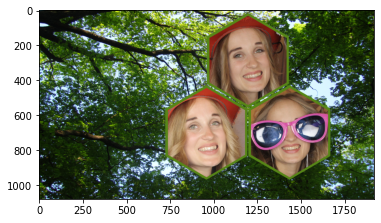

In [ ]:
faces = glob.glob("faces/pos/*jpg")[:5]
#print(faces)
#print(big_points)
print(len(faces))
big_points = readHexPointsFromCSV("big_hex_locations.csv")
collage = placeMultipleHexagon('background.jpg',faces,big_points[:len(faces)],255,1.06,90)
plt.imshow(collage)

# classifiy face detection using thumbs up and thumbs down

In [ ]:
def placeSingleHexagon(background,img,position,dia,outline,rot):
    #drawing a mask as a hexagon, then applying this mask to the img and pasting this img on the background
    #dia = hex diameter
    #rot = hex rotation (0 for flat side up, 90 for tip up)
    #outline = drawing an outline as a factor of masksize around the hexagon (only using green at the moment)
    #position = single tuple of (x,y)    
    
    #thumbs images from:
    #https://www.freepik.com/vectors/thumbs-up
    
    back = Image.open(background)
    masksize = int(2*dia)
    mask = Image.new(mode="L",size = (masksize,masksize), color = (0)) #(mode = "L", 
    draw = ImageDraw.Draw(mask)
    draw.regular_polygon(bounding_circle=((masksize/2,masksize/2),dia), n_sides=6, rotation=rot, fill=(255))
    if outline > 1:
        #f_outl = 1.06
        f_outl = outline
        outline_mask = Image.new(mode="L",size = (int(f_outl*masksize),int(f_outl*masksize)), color = (0)) #(mode = "L", 
        outline_draw = ImageDraw.Draw(outline_mask)
        outline_draw.regular_polygon(bounding_circle=((int((f_outl*masksize)/2),int((f_outl*masksize)/2)),f_outl*dia), n_sides=6, rotation=90, fill=(255))
        img_outline = Image.open('green.png').resize((int(f_outl*masksize),int(f_outl*masksize))).convert("RGB")
        back.paste(img_outline,(int(970-f_outl*dia),int(540-f_outl*dia)),outline_mask)

    img_face = Image.open(img).resize((masksize,masksize)).convert("RGB")
    back.paste(img_face,(int(970-dia),int(540-dia)),mask)
    
    return back


faces\IMG_3944_face1.jpg


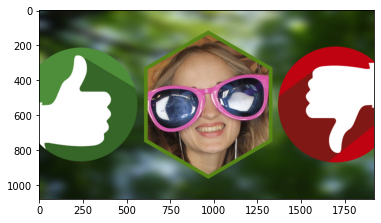

In [ ]:
try:
    face_to_classify = random.choice(glob.glob("faces/*jpg")) 
    print(face_to_classify)
    temp = placeSingleHexagon('thumbs_background.jpg',face_to_classify,(970,540),400,1.06,90)
    plt.imshow(temp)
except:
    print("no face to classify")

In [ ]:
def detectThumbsUpDown(thumbs_img):
    mpHands = mp.solutions.hands
    hands = mpHands.Hands(max_num_hands=2, min_detection_confidence=0.8)
    mpDraw = mp.solutions.drawing_utils

    #model = load_model('hand-gesture-recognition-code\mp_hand_gesture')
    h_org,w_org,temp = thumbs_img.shape
   #print(thumbs_img.shape)
    reduce_factor = 1
    thumbs_img = cv2.resize(thumbs_img, (int(w_org/reduce_factor), int(h_org/reduce_factor)))
    #thumbs_img = cv2.GaussianBlur(thumbs_img, (5,5), 0)
    framergb = cv2.cvtColor(thumbs_img, cv2.COLOR_BGR2RGB)
    #plt.clf()
    #plt.imshow(framergb)
    x , y, c = framergb.shape
    #print(framergb.shape)

    # Get hand landmark prediction

    #process twice due to better results
    counter = 0
    while counter < 2:
        result = hands.process(framergb)
        className = ''
        # post process the result
        if result.multi_hand_landmarks:
            #print("found hand landmarks")
            landmarks_pred = []
            landmarks_draw = []
            shape = thumbs_img.shape
            for handslms in result.multi_hand_landmarks:
                for lm in handslms.landmark:
                    lmx = int(lm.x * x)
                    lmy = int(lm.y * y)
                    landmarks_pred.append([lmx, lmy])
                    landmarks_draw.append([lm.x * shape[1],lm.y * shape[0]])
                    cv2.circle(thumbs_img,(int((lmx/x)*y), int((lmy/y)*x)),15,(255, 0, 0))              
                mpDraw.draw_landmarks(thumbs_img, handslms, mpHands.HAND_CONNECTIONS)
        #else:
            #print("no hand landmarks")
        counter = counter + 1

    # Predict gesture in Hand Gesture Recognition project
    detection_result = 0
    if result.multi_hand_landmarks:
        for i in range(len(landmarks_pred)//21):
            #predict hand class with model
            #prediction = model.predict([landmarks_pred[i*21:(21+(i*21))]]) #problem with predict if more than one hand is detected
            #prediction = model.predict([landmarks_pred[0:21]])
            #--> landmarks sind dann doppelt so lang wie sie für eine hand sein müssten
            #pred = prediction.flatten()
            #classID = np.argmax(pred[0:len(pred)-1]) #ignore smile

            #className = classNames[classID]
            #print("model prediction: %s"%className)
            #cv2.putText(thumbs_img, className, (10, (50+i*50)), cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2, cv2.LINE_AA)


            #seperate thumb up from thumb down based on max y position
            thumb_up_down,valid_thumb_orientation = get_thumb_orientation(landmarks_draw[i*21:(21+(i*21))],False)
            if valid_thumb_orientation:
                if thumb_up_down:
                    #print("landmark calculation: thumb_up")
                    detection_result = 1 #thumb up
                else:
                    #print("landmark calculation: thumb_down")
                    detection_result = 2
                thumb_offset = 4
                cv2.circle(thumbs_img,(int(landmarks_draw[(i*21)+thumb_offset][0]),int(landmarks_draw[(i*21)+thumb_offset][1])),40,(255,128,128),4)


            #get average hand position for future usage
            rx,ry = calc_landmark_center(landmarks_draw[i*21:(21+(i*21))]) 
            cv2.circle(thumbs_img,(rx,ry),100,(0, 255, 255))
        #plt.clf()
        #framergb = cv2.cvtColor(thumbs_img, cv2.COLOR_BGR2RGB)
        #plt.imshow(framergb)
        #cv2.cvtColor(thumbs_img, cv2.COLOR_RGB2BGR)
        #cv2.imwrite("thumbs.jpg", thumbs_img)
    #else:
        
        #print("no hand landmarks in img")
    return detection_result #1 = thumbsup, 2 = thumbs down, 0 is no hands found

In [ ]:
thumbs_img = cv2.imread('thumbsup2.jpg')

In [ ]:
thumbs_img = cv2.imread('thumbsdown.jpg')

In [ ]:
thumbs = detectThumbsUpDown(thumbs_img) 
if thumbs == 0:
    print("no thumbs found")
    #no hands found --> no classification
elif thumbs == 1:
    print("thumbs up")
    dest = "pos"
elif thumbs == 2:
    dest = "neg"
    print("thumbs down")

    

destination = "faces/" + dest + "/" + face_to_classify.split("\\")[1]
source = "faces/" + face_to_classify.split("\\")[1]
print("moving " + face_to_classify.split("\\")[1] + " from " + source + " to " + destination)
try:
    shutil.move(source, destination)
except:
    print("moving not possible")

thumbs up
moving IMG_3944_face1.jpg from faces/IMG_3944_face1.jpg to faces/pos/IMG_3944_face1.jpg
moving not possible


# Template Matching

In [35]:
def matchTemplateToImg(img,template,threshold):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    w, h = template.shape[::-1]
    res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
    #threshold = 0.9
    
    locations = np.where(res >= threshold)

    for point in zip(*locations[::-1]):
      cv2.rectangle(img,point,(point[0]+w,point[1]+h),(0,255,255),2)

    return img
    

## load template 

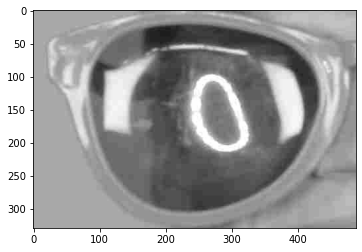

In [14]:
#template = cv2.imread("/content/drive/MyDrive/cvml-emb/template.jpg",0)
template = cv2.imread("./templateMatching/template.jpg",0)
plt.imshow(cv2.cvtColor(template, cv2.COLOR_BGR2RGB))


## apply template to original image 

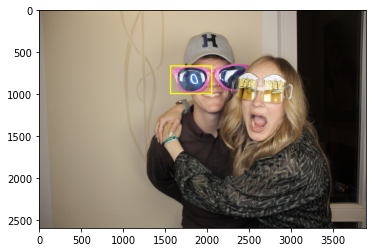

In [41]:
img = cv2.imread("training_data/test_gesicht.JPG")
#img = cv2.imread("/content/drive/MyDrive/cvml-emb/test_gesicht.jpg")

img = matchTemplateToImg(img,template,0.9)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


## apply template to different image

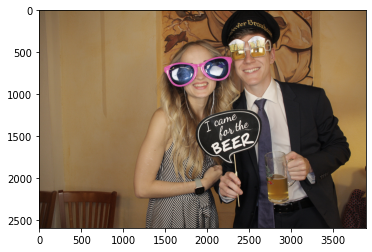

In [46]:
img = cv2.imread("training_data/IMG_3944.JPG")
#img = cv2.imread("training_data/test_gesicht2.JPG")
#img = cv2.imread("/content/drive/MyDrive/cvml-emb/test_gesicht.jpg")

img = matchTemplateToImg(img,template,0.49)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## template with gaussian blur 

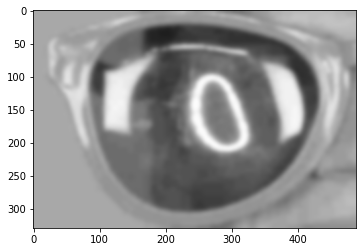

In [43]:
template = cv2.imread("./templateMatching/template.jpg",0)
template = cv2.GaussianBlur(template, (17,17), 0)
plt.imshow(cv2.cvtColor(template, cv2.COLOR_BGR2RGB))

# Cascade Classifier

## preparations (creating samples)

In [58]:
#rescale images to desired size
W = 150
H = 150

In [16]:
def renameFilesInDir(search_dir,extension,basename):
    string = search_dir + "/*" + extension
    print(string)
    files = glob.glob(string)
    print(len(files))
    #print(files)
    print(files[0])
    for index,file in enumerate(files):
        #index = index + 30
        newname = search_dir + "/" + basename + str(index) + ".JPG"
        os.rename(file, newname)
    

In [9]:
renameFilesInDir("C:/projects/fotobooth/data/pos","JPG","im")

C:/projects/fotobooth/data/pos/*JPG
206
C:/projects/fotobooth/data/pos\0a.JPG


In [20]:
renameFilesInDir("C:/projects/fotobooth/cvml/pi_metrics_test/validate/thumbs down","JPG","thumbs down_val")

C:/projects/fotobooth/cvml/pi_metrics_test/validate/thumbs down/*JPG
38
C:/projects/fotobooth/cvml/pi_metrics_test/validate/thumbs down\a (1).jpg


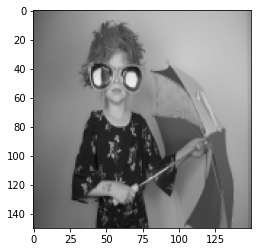

In [59]:
img = cv2.imread("C:/projects/fotobooth/data/pos/im85.JPG",cv2.IMREAD_GRAYSCALE)

resized = cv2.resize(img, (W, H), interpolation=cv2.INTER_AREA)
plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))

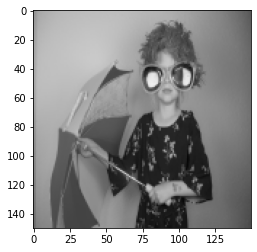

In [60]:
flip = cv2.flip(resized, 1)
plt.imshow(cv2.cvtColor(flip, cv2.COLOR_BGR2RGB))

In [18]:
def rescaleAndFlip(src,dest,w,h,flip):
    string = src + "/*JPG"
    print(string)
    files = glob.glob(string)
    for index,file in enumerate(files):
        img = cv2.imread(file,cv2.IMREAD_GRAYSCALE)
        resized = cv2.resize(img, (w, h), interpolation=cv2.INTER_AREA)
        filename = dest + "/" + str(index) + "a.JPG"
        cv2.imwrite(filename, resized)
        if flip:
            flip = cv2.flip(resized, 1)
            filename = dest + "/" + str(index) + "b.JPG"
            cv2.imwrite(filename, flip)

In [68]:
rescaleAndFlip("C:/projects/fotobooth/data/rohdaten/neg","C:/projects/fotobooth/data/neg",150,150,False)

C:/projects/fotobooth/data/rohdaten/neg/*JPG


## Annotation Tool to create positions of rectangles containing the desired object 

to not annotate the flipped images --> create positions based on flipping horizontally

In [114]:
f = open('C:/projects/fotobooth/data/pos.txt', 'r')
new = open('C:/projects/fotobooth/data/all_pos.txt', 'w+')
lines = f.readlines()
for line in lines:
    #print(line)
    new.write(line)
    #print(line.split("a.JPG "))
    newfile = line.split("a.JPG ")[0]  + "b.JPG"
    positions = line.split("a.JPG ")[1]
    positions = positions.split(" ")
    #print(positions)
    #x,y,w,h
    newline = newfile + " " + str(positions[0])
    offset = 4
    for i in range(1,int(positions[0])+1):
        #print(i)
        oldx,oldy,oldw,oldh = positions[(i-1)*offset+1],positions[(i-1)*offset+2],positions[(i-1)*offset+3],positions[(i-1)*offset+4]
        #print(oldx,oldy,oldw,oldh)
        
        newy = oldy
        newh = oldh
        neww = oldw.rstrip()
        
        #shape needs to be edited!!!!
        newx = abs(150 - int(oldx) - int(oldw))
        
        newline = newline + " " + str(newx)+ " " + newy+ " " +neww+ " " + newh
    new.write(newline)
    
f.close()
new.close()

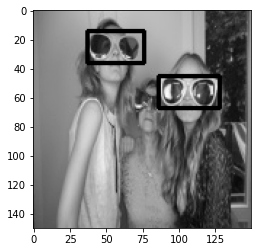

In [110]:
#67a.JPG 2 37 14 39 22 86 45 42 22

img = cv2.imread("C:/projects/fotobooth/data/pos/67a.JPG",cv2.IMREAD_GRAYSCALE)
_ = cv2.rectangle(img, (37,14) , (37+39,14+22), (0, 255, 0), 2) #read the sizes manual from pos.txt
_ = cv2.rectangle(img, (86,45) , (86+42,45+22), (0, 255, 0), 2)
plt.imshow(img, cmap='gray')

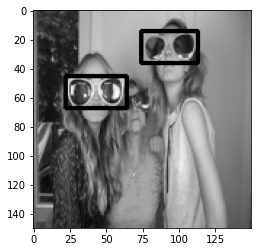

In [111]:
#67b.JPG 2 74 14 39 22 22 45 42 22

img = cv2.imread("C:/projects/fotobooth/data/pos/67b.JPG",cv2.IMREAD_GRAYSCALE)
_ = cv2.rectangle(img, (74,14) , (74+39,14+22), (0, 255, 0), 2) #read the sizes manual from pos.txt
_ = cv2.rectangle(img, (22,45) , (22+42,45+22), (0, 255, 0), 2)
plt.imshow(img, cmap='gray')

(88, 88)


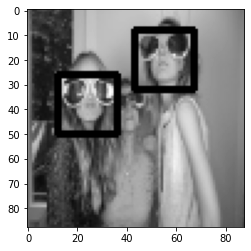

In [5]:
#67b.JPG 2 74 14 39 22 22 45 42 22
reduce_factor = 1.7 #reduce images from 150/150 to about 88/88 --> Annotated Areas represent about 24/24 --> input for gui trainer
img = cv2.imread("C:/projects/fotobooth/data/pos/67b.JPG",cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (int(150/reduce_factor), int(150/reduce_factor)))
print(img.shape)
_ = cv2.rectangle(img, (int(74/reduce_factor),int(14/reduce_factor)) , (int(74/reduce_factor)+24,int(14/reduce_factor)+24), (0, 255, 0), 2) #read the sizes manual from pos.txt
_ = cv2.rectangle(img, (int(22/reduce_factor),int(45/reduce_factor)) , (int(22/reduce_factor)+24,int(45/reduce_factor)+24), (0, 255, 0), 2)
plt.imshow(img, cmap='gray')

based on this test the flipped annotations should be correct

In [128]:
bg = open('C:/projects/fotobooth/data/bg.txt', 'w+')
files = glob.glob('C:/projects/fotobooth/data/neg/*JPG')
print(len(files))
print(files[0])
for file in files:
    name = file.split("C:/projects/fotobooth/data/neg")[1]
    name = name[1:len(name)]
    string = "neg/" + name + "\n"
    bg.write(string)
bg.close()

244
C:/projects/fotobooth/data/neg\0a.JPG


## crop images to annotated areas --> gui trainer takes only images as input not the filelist

In [17]:
width = height = 24

new = open('C:/projects/fotobooth/data/all_pos.txt', 'r')
lines = new.readlines()
file_counter = 0
for line in lines:
    newfile = line.split(".JPG ")[0]  + ".JPG"
    #print(newfile)
    positions = line.split(".JPG ")[1]
    positions = positions.split(" ")
    #print(positions)
    #x,y,w,h
    offset = 4
    reduce_factor = 1.7
    img = cv2.imread("C:/projects/fotobooth/data/pos/" + newfile,cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (int(150/reduce_factor), int(150/reduce_factor)))
    for i in range(1,int(positions[0])+1):
        #print(i)
        cropped_img = np.zeros((height, width, 1), np.uint8)
        oldx,oldy,oldw,oldh = positions[(i-1)*offset+1],positions[(i-1)*offset+2],positions[(i-1)*offset+3],positions[(i-1)*offset+4]
        #print(oldx,oldy,oldw,oldh)
        x = int(int(oldx)/reduce_factor)
        y = int(int(oldy)/reduce_factor)
        cropped_img = img[y:y + height, x:x + width]
        cropped_filename = "C:/projects/fotobooth/data/pos_cropped/" + str(file_counter) + ".JPG"
        try:
            cv2.imwrite(cropped_filename, cropped_img)
        except:
            pass
        file_counter += 1
        

0a.JPG
0b.JPG
1a.JPG
1b.JPG
2a.JPG
2b.JPG
3a.JPG
3b.JPG
4a.JPG
4b.JPG
5a.JPG
5b.JPG
6a.JPG
6b.JPG
7a.JPG
7b.JPG
8a.JPG
8b.JPG
9a.JPG
9b.JPG
10a.JPG
10b.JPG
11a.JPG
11b.JPG
12a.JPG
12b.JPG
13a.JPG
13b.JPG
14a.JPG
14b.JPG
15a.JPG
15b.JPG
16a.JPG
16b.JPG
17a.JPG
17b.JPG
18a.JPG
18b.JPG
19a.JPG
19b.JPG
20a.JPG
20b.JPG
21a.JPG
21b.JPG
22a.JPG
22b.JPG
23a.JPG
23b.JPG
24a.JPG
24b.JPG
25a.JPG
25b.JPG
26a.JPG
26b.JPG
27a.JPG
27b.JPG
28a.JPG
28b.JPG
29a.JPG
29b.JPG
30a.JPG
30b.JPG
31a.JPG
31b.JPG
32a.JPG
32b.JPG
34a.JPG
34b.JPG
36a.JPG
36b.JPG
35a.JPG
35b.JPG
33a.JPG
33b.JPG
37a.JPG
37b.JPG
38a.JPG
38b.JPG
39a.JPG
39b.JPG
40a.JPG
40b.JPG
41a.JPG
41b.JPG
42a.JPG
42b.JPG
43a.JPG
43b.JPG
44a.JPG
44b.JPG
45a.JPG
45b.JPG
46a.JPG
46b.JPG
47a.JPG
47b.JPG
48a.JPG
48b.JPG
49a.JPG
49b.JPG
50a.JPG
50b.JPG
51a.JPG
51b.JPG
52a.JPG
52b.JPG
53a.JPG
53b.JPG
54a.JPG
54b.JPG
55a.JPG
55b.JPG
56a.JPG
56b.JPG
57a.JPG
57b.JPG
58a.JPG
58b.JPG
59a.JPG
59b.JPG
60a.JPG
60b.JPG
61a.JPG
61b.JPG
62a.JPG
62b.JPG
63a.JPG
63b.

(24, 24)
(24, 24)
30
(24, 24)


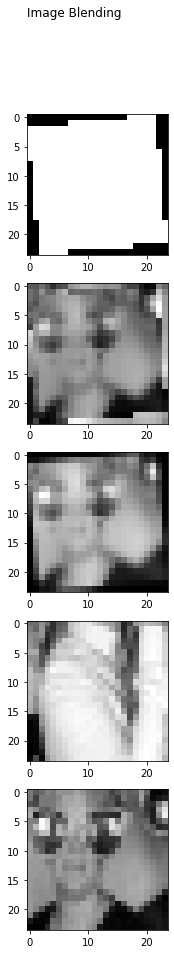

In [79]:
#to create even more samples from one pos image --> rotate and 3DWarp images
def rotation(image, angleInDegrees):
    h, w = image.shape[:2]
    img_c = (w / 2, h / 2)

    rot = cv2.getRotationMatrix2D(img_c, angleInDegrees, 1)

    rad = math.radians(angleInDegrees)
    sin = math.sin(rad)
    cos = math.cos(rad)
    b_w = int((h * abs(sin)) + (w * abs(cos)))
    b_h = int((h * abs(cos)) + (w * abs(sin)))

    rot[0, 2] += ((b_w / 2) - img_c[0])
    rot[1, 2] += ((b_h / 2) - img_c[1])

    outImg = cv2.warpAffine(image, rot, (b_w, b_h), flags=cv2.INTER_LINEAR)
    return outImg

#def rotate_image(image, angle):
#    image_center = tuple(np.array(image.shape[1::-1]) / 2)
#    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
#    result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
#    return result

width = height = 24
    
rotation_angle = 5   
    
#create a mask to blend images together based on white or black mask
mask = np.ones((height, width, 1), np.uint8)
mask = rotation(mask, rotation_angle)
mask = cv2.resize(mask, (width, height))
#plt.imshow(mask, cmap='gray')
#67b.JPG 2 74 14 39 22 22 45 42 22
#reduce_factor = 1.7 #reduce images from 150/150 to about 88/88 --> Annotated Areas represent about 24/24 --> input for gui trainer
normal_img = cv2.imread("C:/projects/fotobooth/data/pos_cropped/67.JPG",cv2.IMREAD_GRAYSCALE)
#img = cv2.resize(img, (int(150/reduce_factor), int(150/reduce_factor)))
print(img.shape)
img = rotation(normal_img, rotation_angle)
rotated_img = cv2.resize(img, (width, height))

print(rotated_img.shape)
bg = cv2.imread("C:/projects/fotobooth/data/neg/10a.JPG",cv2.IMREAD_GRAYSCALE)
bg = cv2.resize(bg, (88, 88))
random_point = random.randint(0,88-height)
print(random_point)
bg = bg[random_point:random_point + height, random_point:random_point + width]
print(bg.shape)
img = cv2.addWeighted(rotated_img, 1, bg*(1-mask), 1, 0)
#img = img + bg

#_ = cv2.rectangle(img, (int(74/reduce_factor),int(14/reduce_factor)) , (int(74/reduce_factor)+24,int(14/reduce_factor)+24), (0, 255, 0), 2) #read the sizes manual from pos.txt
#_ = cv2.rectangle(img, (int(22/reduce_factor),int(45/reduce_factor)) , (int(22/reduce_factor)+24,int(45/reduce_factor)+24), (0, 255, 0), 2)
#plt.imshow(img, cmap='gray')

fig,axs = plt.subplots(5,figsize=(25,15))
fig.suptitle('Image Blending')
axs[0].imshow(mask, cmap='gray')
axs[1].imshow(img, cmap='gray')
axs[2].imshow(rotated_img, cmap='gray')
axs[3].imshow(bg, cmap='gray')
axs[4].imshow(normal_img, cmap='gray')

In [75]:
print(int(150/1.7))

88


In [563]:
glasses_classifier = cv2.CascadeClassifier(r"C:/projects/fotobooth/data/gui_trainer/big_glasses_classifier_5.xml")

In [392]:
def readImg(path):
    #org_img = cv2.imread("C:/projects/fotobooth/data/rohdaten/pos/im20.JPG")
    #org_img = cv2.imread("C:/projects/fotobooth/data/rohdaten/pos/im19.JPG")
    org_img = cv2.imread(path)
    h_org,w_org,temp = org_img.shape
    print(org_img.shape)
    reduce_factor = 3
    img = cv2.resize(org_img, (500, 500))

    plt.figure(figsize=(6, 4), dpi=150)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    im_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    plt.imshow(im_gray, cmap="gray")
    print(im_gray.shape)
    reducer = org_img.shape[0] / im_gray.shape[0] ,org_img.shape[1] / im_gray.shape[1]
    print(reducer)
    return im_gray,reducer,org_img

In [503]:
def detectOnImg(scale,neighbors):
    face_boxes,rejectLevels, levelWeights = glasses_classifier.detectMultiScale3(im_gray, scaleFactor=scale, minNeighbors=neighbors, outputRejectLevels=True)
    #print(face_boxes)
    #print(rejectLevels)
    #print(levelWeights)
    return face_boxes,rejectLevels,levelWeights

In [458]:
def drawBoxes(function_img,boxes,weights,score_val,only_max_confidence):
    new_img = np.zeros((function_img.shape[0],function_img.shape[1]), np.uint8)
    new_img[:,:] = function_img[:,:]
    del function_img
    #score_val = 1

    print(boxes)
    print(weights)
    plt.clf()
    plt.figure(figsize=(6, 4), dpi=150)
    i = d_boxes = 0
    verified_boxes = []
    if only_max_confidence:
        index = np.argmax(levelWeights)
        (x, y, w, h) = boxes[index]
        cv2.rectangle(new_img, (x, y), (x + w, y + h), (0, 255, 0), 3)
        d_boxes = 1
        verified_boxes += [(x, y, w, h)]
    else:
        
        for (x, y, w, h) in boxes:
            #print(x, y, w, h)


            if (weights[i]>score_val):
                print("drawing on img: ",x, y, w, h)
                cv2.rectangle(new_img, (x, y), (x + w, y + h), (0, 255, 0), 3)    #cv2.rectangle(org_img,(int(x*reduce_factor), int(y*reduce_factor)),(int(x*reduce_factor + w*reduce_factor), int(y*reduce_factor + h*reduce_factor)), (0, 255, 0), 5)
                print("drawing done")
                d_boxes += 1
                verified_boxes += [(x, y, w, h)]
            i += 1
    #plt.imshow(new_img, cmap="gray")
    return new_img,d_boxes,verified_boxes

In [434]:
np.argmax(levelWeights)

2

(2592, 3888, 3)
(500, 500)
(5.184, 7.776)
[[217  48 140 140]]
[3.15620174]


<Figure size 900x600 with 0 Axes>

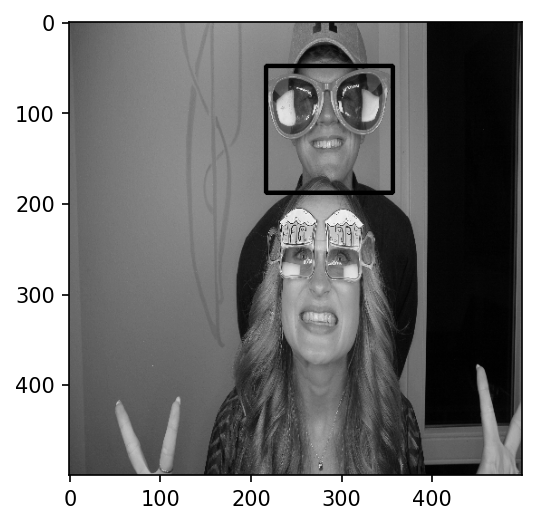

In [564]:
score_val = 3.3
show_only_max_confidence = True

try:
    
    del im_gray
    del im_rect
except:
    pass
#im_rect = im_gray
im_gray,reducer,org_img = readImg("C:/projects/fotobooth/data/rohdaten/pos/im9.JPG")
#for i in range(2):
face_boxes,rejectLevels, levelWeights = detectOnImg(1.8,5)
im_test,drawn_boxes,ver_boxes = drawBoxes(im_gray,face_boxes,levelWeights,score_val,show_only_max_confidence)
plt.imshow(im_test, cmap="gray")

## export cropped images with detected glasses 

1
1461.888 544.32 808.704 539.136


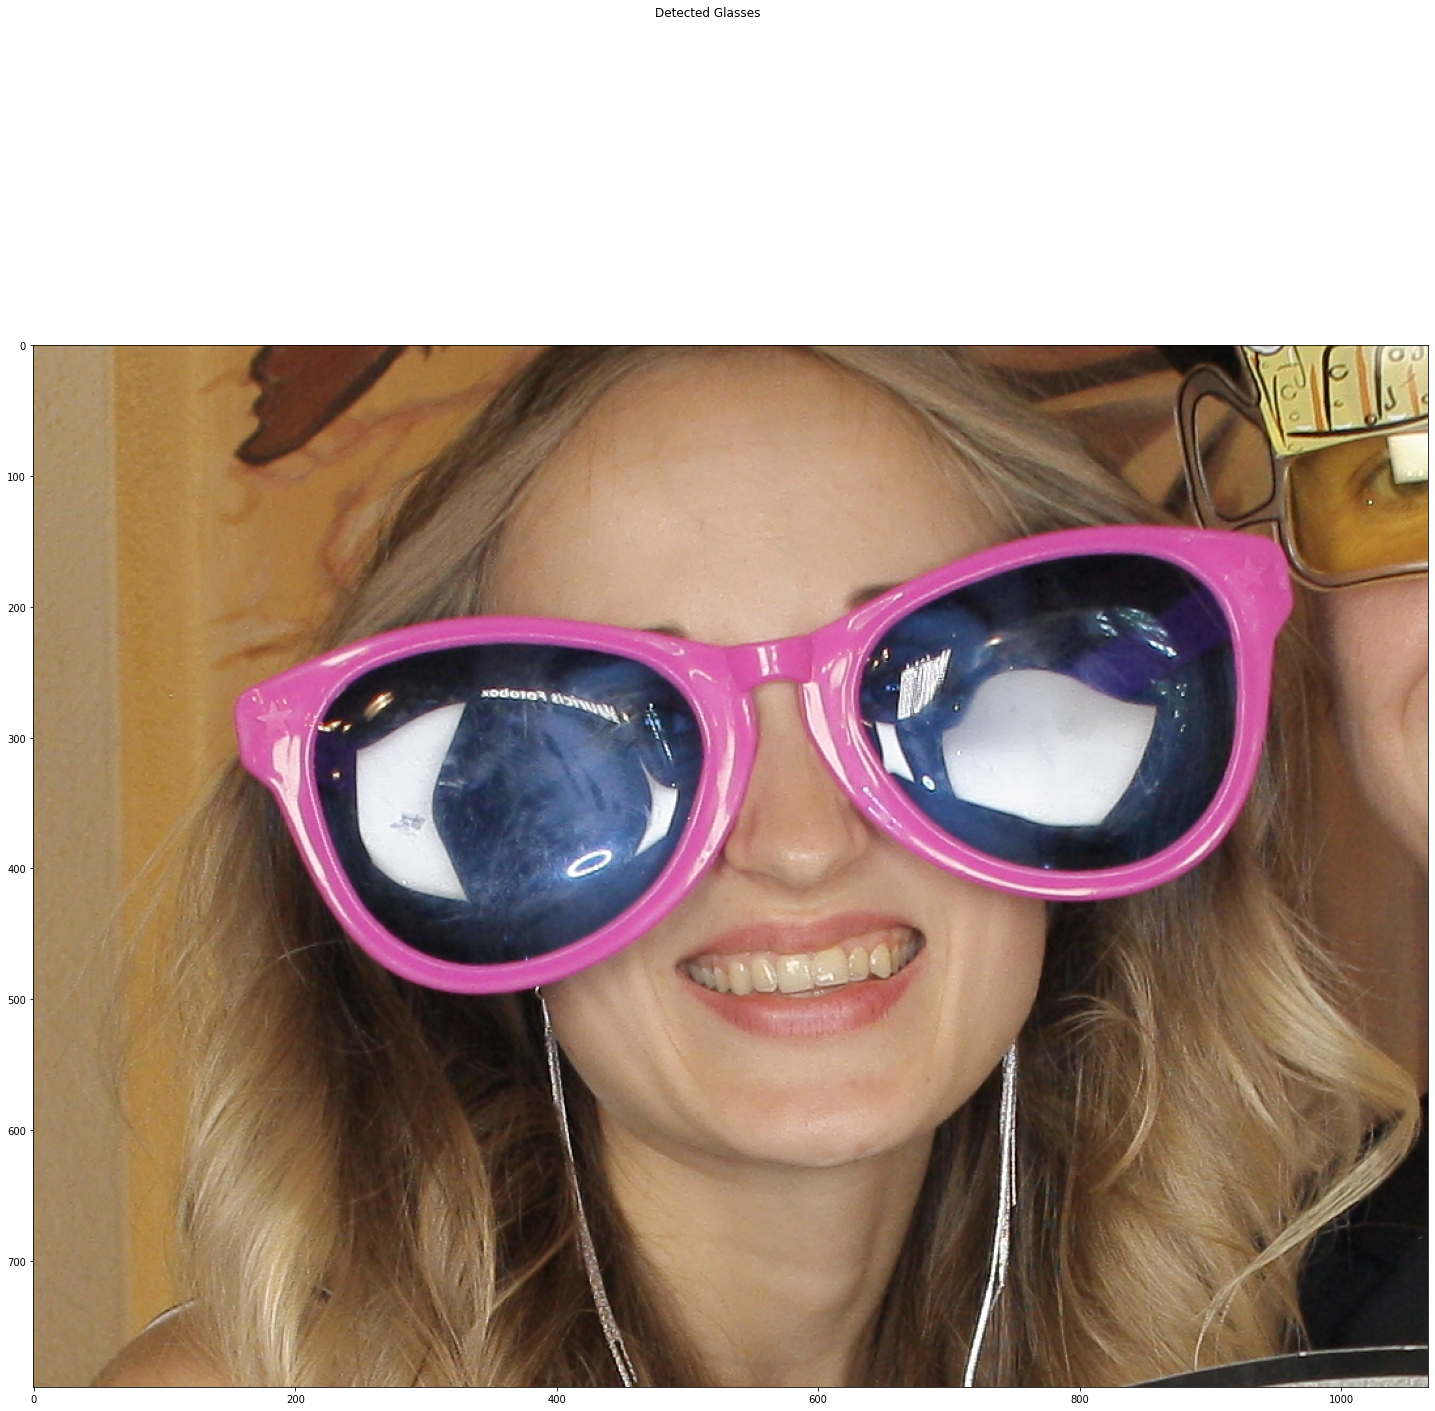

In [650]:

reduce_factor = reducer
i = 0
#plt.figure(figsize=(4, 8), dpi=150)
print(drawn_boxes)

fig,axs = plt.subplots(drawn_boxes,figsize=(25,25))
axs_index = 0
fig.suptitle('Detected Glasses')
for face_box in ver_boxes:
    #x, y, w_box, h_box = face_box*reduce_factor
    x,w_box = face_box[0]*reduce_factor[1],face_box[2]*reduce_factor[1]
    y,h_box = face_box[1]*reduce_factor[0],face_box[3]*reduce_factor[0]
    #h_org of original image
    #w_org of original image
    print(x, y, w_box, h_box)
    h_org,w_org,temp = org_img.shape
    crop_padding = int(h_org/20) #crop border is 1/15 of the orig. image height
    x = x - crop_padding
    y = y - crop_padding
    if x <= 0:
      x = 0
    if y <= 0:
      y = 0

    #create size of face box with padding
    w_box = w_box + 2*crop_padding
    h_box = h_box + 2*crop_padding

    #if face is near edge --> cropped image is moved from edge away
    if (x + w_box) >= w_org:
      x = w_org - w_box
    if (y + h_box) >= h_org:
      y = h_org - h_box

    #print(x, y, w_box, h_box)
    cropped_img = org_img[int(y):int(y+h_box), int(x):int(x+w_box)]

    #plt.imshow(cropped_img)
    new_cropped_img = cv2.cvtColor(cropped_img,cv2.COLOR_BGR2RGB)
    filename = "glasses%s.jpg"%(axs_index)
    cv2.imwrite(filename, cropped_img)
    if drawn_boxes > 1:
        axs[axs_index].imshow(new_cropped_img)

        axs_index = axs_index+1
    else:
        plt.imshow(new_cropped_img)
    i = i+1

## Gridsearch for highest levelWeights

In [512]:
#scales = np.arange(1,2.5,0.02)
#neigh = np.arange(1,50,1)
scales = np.arange(1.1,2,0.1)
neigh = np.arange(1,30,2)


print(scales)
print(neigh)

[1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9]
[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29]


(2592, 3888, 3)
(500, 500)
(5.184, 7.776)
(3.1692412346601486, 1.1, 1)
(3.7784543186426163, 1.1, 1)
(3.1692412346601486, 1.1, 3)
(3.7784543186426163, 1.1, 3)
(3.1692412346601486, 1.1, 5)
(3.7784543186426163, 1.1, 5)
(2.251850739121437, 1.1, 7)
(3.7784543186426163, 1.1, 7)
(2.251850739121437, 1.1, 9)
(3.7784543186426163, 1.1, 9)
(2.251850739121437, 1.1, 11)
(3.7784543186426163, 1.1, 11)
(2.251850739121437, 1.1, 13)
(3.7784543186426163, 1.1, 13)
(2.251850739121437, 1.1, 15)
(3.7784543186426163, 1.1, 15)
(2.251850739121437, 1.1, 17)
(3.7784543186426163, 1.1, 17)
(2.251850739121437, 1.1, 19)
(3.7784543186426163, 1.1, 19)
(2.251850739121437, 1.1, 21)
(3.7784543186426163, 1.1, 21)
(2.251850739121437, 1.1, 23)
(3.7784543186426163, 1.1, 23)
(2.8653271198272705, 1.2, 1)
(3.018714502453804, 1.2, 1)
(2.8653271198272705, 1.2, 3)
(3.018714502453804, 1.2, 3)
(2.8653271198272705, 1.2, 5)
(3.018714502453804, 1.2, 5)
(2.8653271198272705, 1.2, 7)
(3.018714502453804, 1.2, 7)
(1.992459774017334, 1.3, 1)
(

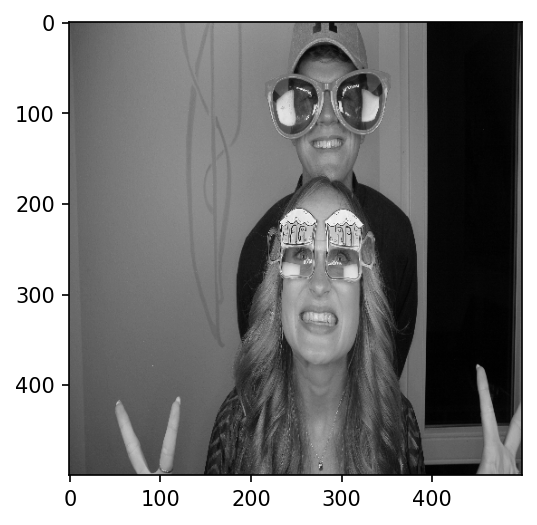

In [584]:
im_gray,reducer,org_img = readImg("C:/projects/fotobooth/data/rohdaten/pos/im9.JPG")
max_score = (0,0,0)
for scale in scales:
    scale = round(scale,2)
    for n in neigh:
        #print(neigh)
        face_boxes,rejectLevels, levelWeights = detectOnImg(scale,n)
        if len(levelWeights)>1:
            #highest = levelWeights[np.argmax(levelWeights)]
            highest = np.argpartition(levelWeights, -2)[-2:]
            highest = levelWeights[highest]
            for high in highest:
                #if high > max_score[0]:
                #    print("temp max score: ",max_score)
                #    max_score = (high,scale,n)
                print((high,scale,n))
            
        #results += [(highest,scale,n)]
    #print(scale)
#print(results)
print(max_score)


## best performance on most images 

best performance: score_val = 1.8; scale = 1.2; neighbors = 5;

(2592, 3888, 3)
(500, 500)
(5.184, 7.776)
[[126 153 107 107]
 [231 175 110 110]]
[4.54513668 2.32345679]
drawing on img:  126 153 107 107
drawing done
drawing on img:  231 175 110 110
drawing done


<Figure size 900x600 with 0 Axes>

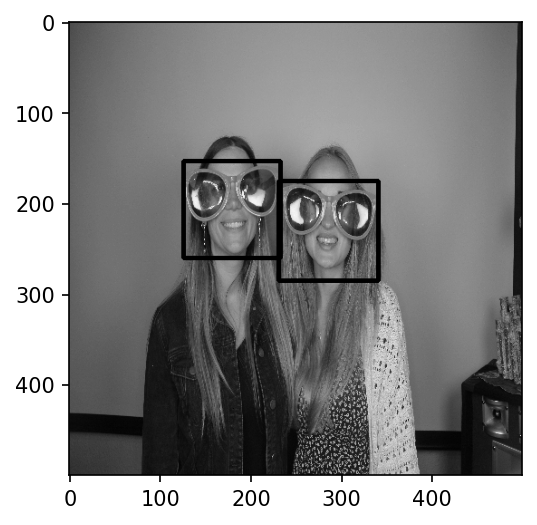

In [643]:
score_val = 1.8
show_only_max_confidence = False

try:

    del im_gray
    del im_rect
except:
    pass
#im_rect = im_gray
im_gray,reducer,org_img = readImg("C:/projects/fotobooth/data/rohdaten/pos/im4.JPG")

#for i in range(2):
face_boxes,rejectLevels, levelWeights = detectOnImg(1.2,5)
im_test,drawn_boxes,ver_boxes = drawBoxes(im_gray,face_boxes,levelWeights,score_val,show_only_max_confidence)
plt.imshow(im_test, cmap="gray")

(2592, 3888, 3)
(500, 500)
(5.184, 7.776)
[[210 119 101 101]
 [320 334  50  50]]
[2.97099148 2.97099148]


<Figure size 900x600 with 0 Axes>

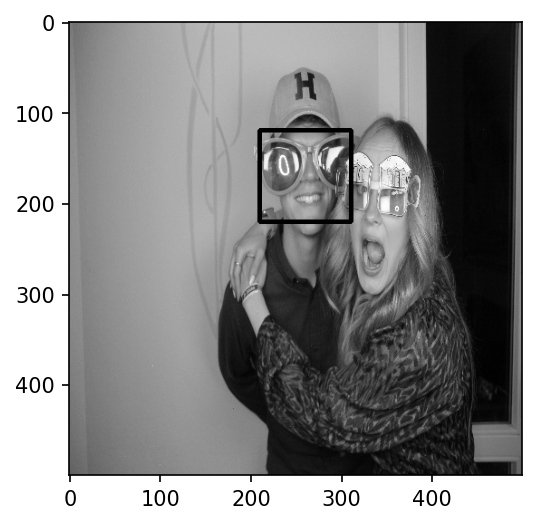

In [645]:
score_val = 1.8
show_only_max_confidence = True

try:

    del im_gray
    del im_rect
except:
    pass
#im_rect = im_gray
#im_gray,reducer,org_img = readImg("C:/projects/fotobooth/data/rohdaten/pos/im9.JPG")
im_gray,reducer,org_img = readImg("C:/projects/fotobooth/cvml/training_data/test_gesicht.JPG")
#for i in range(2):
face_boxes,rejectLevels, levelWeights = detectOnImg(1.2,5)
im_test,drawn_boxes,ver_boxes = drawBoxes(im_gray,face_boxes,levelWeights,score_val,show_only_max_confidence)
plt.imshow(im_test, cmap="gray")

(2592, 3888, 3)
(500, 500)
(5.184, 7.776)
[[175  80 124 124]]
[4.42563049]


<Figure size 900x600 with 0 Axes>

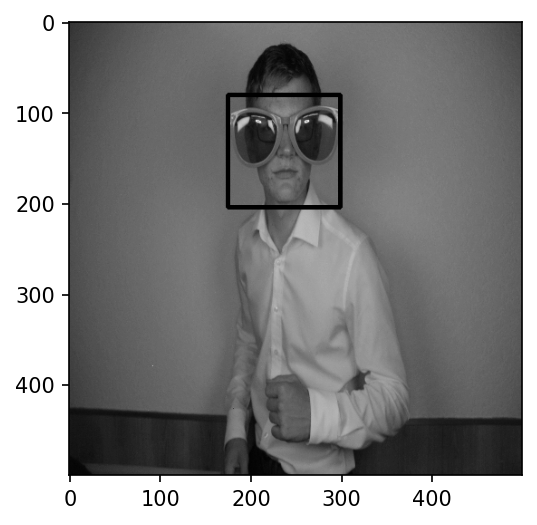

In [647]:
score_val = 1.8
show_only_max_confidence = True

try:

    del im_gray
    del im_rect
except:
    pass
#im_rect = im_gray
im_gray,reducer,org_img = readImg("C:/projects/fotobooth/data/rohdaten/pos/im53.JPG")

#for i in range(2):
face_boxes,rejectLevels, levelWeights = detectOnImg(1.2,5)
im_test,drawn_boxes,ver_boxes = drawBoxes(im_gray,face_boxes,levelWeights,score_val,show_only_max_confidence)
plt.imshow(im_test, cmap="gray")

(2592, 3888, 3)
(500, 500)
(5.184, 7.776)
[[188 105 104 104]]
[0.86519097]


<Figure size 900x600 with 0 Axes>

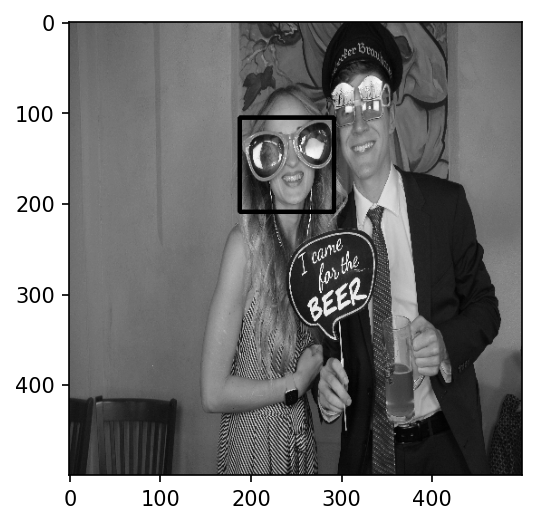

In [649]:
score_val = 1.8
show_only_max_confidence = True

try:

    del im_gray
    del im_rect
except:
    pass
#im_rect = im_gray
im_gray,reducer,org_img = readImg("C:/projects/fotobooth/data/rohdaten/pos/im54.JPG")

#for i in range(2):
face_boxes,rejectLevels, levelWeights = detectOnImg(1.2,5)
im_test,drawn_boxes,ver_boxes = drawBoxes(im_gray,face_boxes,levelWeights,score_val,show_only_max_confidence)
plt.imshow(im_test, cmap="gray")
